# Week Four - Part 2 
## Assignment High Frequency Words (DATA 620)
#### Authors: John Mazon, Leticia Cancel, Bharani Nittala

## Objective

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

## Table of Contents

1. [Data Source](#source)
2. [Data Extraction](#extract)
3. [Importing Key Libraries](#lib)
4. [Data Cleaning](#clean)
5. [Exploratory Data Analysis](#eda)
6. [Solutions](#sol)


## 1. Data Source <a id = 'source'></a>

#### Source: Kaggle datasets
#### Dataset name: Amazon Fine Food Reviews

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

Data includes:

Reviews from Oct 1999 - Oct 2012
568,454 reviews
256,059 users
74,258 products
260 users with > 50 reviews

## 2. Data Extraction <a id = 'extract'></a>

Data Extraction is done directly from Kaggle API, using the steps below - 

### Connect to Kaggle API <a id = 'data'></a>

Source: https://medium.com/analytics-vidhya/fetch-data-from-kaggle-with-python

First things first, if you want to interact with Kaggle, you must sign up and have an account. With an account, you will be able to enter the competitions, view other notebooks, codings and also download datasets for your analysis and other transformations.

Before we explore more, for accessing Kaggle API we need to install it:

In [ ]:
# Install kaggle library
pip install kaggle

Now, we need to create API credentials — it is pretty straightforward. On your Kaggle account, under API, select “Create New API Token,” and kaggle.json will be downloaded on your computer.
Go to directory — “C:\Users\<username>\.kaggle\” — and paste here downloaded JSON file.
With the following code, you can connect to Kaggle :

In [47]:
# Connecting with Kaggle through API
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [153]:
# Setting up the Kaggle library of datasets, competitions and other folders
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [258]:
# Exploring Reviews related datasets by sorting the datasets with highest to lowest votes given by the Kaggle users
# We see that third top rated dataset seem to have Amazon reviews which we want to leverage in our assignment
!kaggle datasets list --sort-by votes -s 'Reviews'

ref                                                    title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
zynicide/wine-reviews                                  Wine Reviews                                   51MB  2017-11-27 17:08:04         139139       3102  0.7941176        
dgomonov/new-york-city-airbnb-open-data                New York City Airbnb Open Data                  2MB  2019-08-12 16:24:45         101191       2345  1.0              
snap/amazon-fine-food-reviews                          Amazon Fine Food Reviews                      242MB  2017-05-01 18:51:31          99857       1680  0.7941176        
olistbr/brazilian-ecommerce                            Brazilian E-Commerce Public Dataset by Olist   43MB  2018-11-29 12:22:57        

In [124]:
# Downloading the identified Amazon Fine Food Reviews dataset
!kaggle datasets download -d snap/amazon-fine-food-reviews


  0%|          | 0.00/242M [00:00<?, ?B/s]
  0%|          | 1.00M/242M [00:00<02:31, 1.67MB/s]
  1%|          | 2.00M/242M [00:00<01:53, 2.22MB/s]
  2%|1         | 4.00M/242M [00:00<01:24, 2.97MB/s]
  2%|2         | 6.00M/242M [00:01<01:03, 3.92MB/s]
  3%|3         | 8.00M/242M [00:01<00:48, 5.08MB/s]
  4%|4         | 10.0M/242M [00:01<00:38, 6.38MB/s]
  5%|4         | 12.0M/242M [00:01<00:30, 7.79MB/s]
  6%|5         | 14.0M/242M [00:01<00:25, 9.32MB/s]
  7%|6         | 16.0M/242M [00:01<00:21, 10.9MB/s]
  7%|7         | 18.0M/242M [00:01<00:19, 12.2MB/s]
  8%|8         | 20.0M/242M [00:02<00:21, 11.1MB/s]
  9%|9         | 22.0M/242M [00:02<00:18, 12.5MB/s]
 10%|9         | 24.0M/242M [00:02<00:16, 13.8MB/s]
 11%|#         | 26.0M/242M [00:02<00:14, 15.3MB/s]
 12%|#1        | 28.0M/242M [00:02<00:14, 15.2MB/s]
 12%|#2        | 30.0M/242M [00:02<00:13, 16.3MB/s]
 13%|#3        | 32.0M/242M [00:02<00:13, 16.7MB/s]
 14%|#4        | 34.0M/242M [00:02<00:12, 17.6MB/s]
 15%|#4        | 36.


 85%|########5 | 207M/242M [00:13<00:02, 16.3MB/s]
 86%|########6 | 209M/242M [00:13<00:02, 16.0MB/s]
 87%|########7 | 211M/242M [00:13<00:01, 16.5MB/s]
 88%|########7 | 213M/242M [00:13<00:01, 16.2MB/s]
 89%|########8 | 215M/242M [00:14<00:01, 16.2MB/s]
 90%|########9 | 217M/242M [00:14<00:01, 16.9MB/s]
 90%|######### | 219M/242M [00:14<00:01, 16.3MB/s]
 91%|#########1| 221M/242M [00:14<00:01, 16.6MB/s]
 92%|#########2| 223M/242M [00:14<00:01, 17.6MB/s]
 93%|#########2| 225M/242M [00:14<00:01, 17.1MB/s]
 94%|#########3| 227M/242M [00:14<00:00, 17.4MB/s]
 95%|#########4| 229M/242M [00:14<00:00, 17.2MB/s]
 95%|#########5| 231M/242M [00:15<00:00, 17.3MB/s]
 96%|#########6| 233M/242M [00:15<00:00, 17.5MB/s]
 97%|#########7| 235M/242M [00:15<00:00, 17.8MB/s]
 98%|#########7| 237M/242M [00:15<00:00, 17.3MB/s]
 99%|#########8| 239M/242M [00:15<00:00, 17.5MB/s]
100%|#########9| 241M/242M [00:15<00:00, 17.8MB/s]
100%|##########| 242M/242M [00:15<00:00, 16.2MB/s]


In [126]:
# Importing zipfile library to unzip the files downloaded to local drive
from zipfile import ZipFile
zf = ZipFile('amazon-fine-food-reviews.zip')
zf.extractall("food-reviews/")
zf.close()

## 3. Importing Key Libraries <a id = 'lib'></a>

In [259]:
# Standard set of libraries required to perform Exploratory analysis. These also include Natural Language Toolkit library 
# required to perform text analysis required in this assingment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [260]:
# Read the dataset 
df = pd.read_csv('food-reviews/Reviews.csv',encoding='utf8')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [261]:
# Understanding the variables in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


#### There are total of 10 columns in the dataset with 568,454 rows. The key column for the analysis is 'Text'

## 4. Data Cleaning <a id = 'clean'></a>

In [262]:
# Understanding the text in the reviews related column. Reading through few lines, seem like the fine food reviews span across 
# multiple topics in the category
df.Text[1:10]

1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
5    I got a wild hair for taffy and ordered this f...
6    This saltwater taffy had great flavors and was...
7    This taffy is so good.  It is very soft and ch...
8    Right now I'm mostly just sprouting this so my...
9    This is a very healthy dog food. Good for thei...
Name: Text, dtype: object

In [164]:
# Performing data cleaning on the reviews column.This is requried to remove special symbols, convert the text to lower case
# The resulting list still contains all the rows but with treatment done on the text
cult_list=[]

for cult in df.Text:
    cult=re.sub("[^a-zA-z]"," ",cult) 
    cult=cult.lower()
    cult=nltk.word_tokenize(cult)
    lemma=nlp.WordNetLemmatizer()
    cult=[lemma.lemmatize(word) for word in cult]
    cult=" ".join(cult)
    cult_list.append(cult)

In [189]:
# Create a list of lists containing lowercase words for each review
words_in_review = [review.split() for review in cult_list]

In [195]:
# List of all words across reviews
all_words = list(itertools.chain(*words_in_review))

# Create counter
counts = collections.Counter(all_words)

counts.most_common(15)

[('the', 1872629),
 ('i', 1692458),
 ('a', 1516491),
 ('and', 1289802),
 ('it', 1108934),
 ('to', 1015511),
 ('of', 802111),
 ('is', 734377),
 ('this', 674783),
 ('br', 647127),
 ('for', 552590),
 ('in', 548171),
 ('my', 463905),
 ('that', 454287),
 ('but', 376362)]

In [197]:
clean_reviews = pd.DataFrame(counts.most_common(15),
                             columns=['words', 'count'])

clean_reviews.head()

,words,count
0,the,1872629
1,i,1692458
2,a,1516491
3,and,1289802
4,it,1108934


In [218]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

# View a few words from the set
list(stop_words)[0:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nittalab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [219]:
newStopWords = ['br','wa','one','would','like','hate','taste','ha','get']
stop_words.append(newStopWords)

In [220]:
reviews_new = [[word for word in review_words if not word in stop_words]
              for review_words in words_in_review]

reviews_new [0]

['bought',
 'several',
 'vitality',
 'canned',
 'dog',
 'food',
 'product',
 'found',
 'good',
 'quality',
 'product',
 'look',
 'like',
 'stew',
 'processed',
 'meat',
 'smell',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better']

In [221]:
# List of all words across reviews
all_words = list(itertools.chain(*reviews_new))

# Create counter
counts = collections.Counter(all_words)

counts.most_common(15)

[('br', 647127),
 ('wa', 315835),
 ('like', 267990),
 ('taste', 218479),
 ('good', 202409),
 ('product', 200183),
 ('one', 193159),
 ('flavor', 187627),
 ('coffee', 176323),
 ('great', 167190),
 ('love', 164014),
 ('tea', 153868),
 ('food', 153389),
 ('ha', 132010),
 ('would', 124303)]

In [222]:
clean_reviews = pd.DataFrame(counts.most_common(100),
                             columns=['words', 'count'])

clean_reviews.head()

,words,count
0,br,647127
1,wa,315835
2,like,267990
3,taste,218479
4,good,202409


## 5.Exploratory Data Analysis <a id = 'eda'></a>

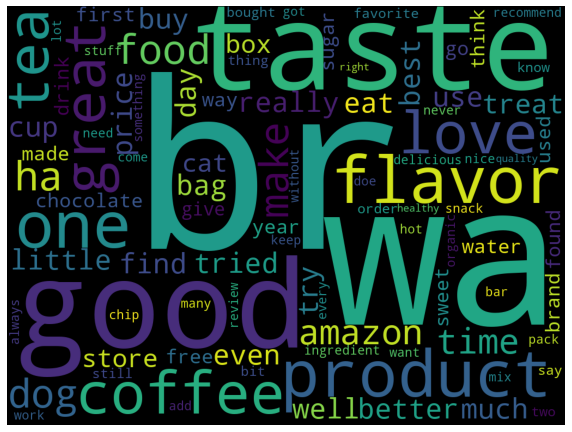

In [223]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,10))
wordcloud=WordCloud(background_color="black",width=1024,height=768).generate(" ".join(clean_reviews.words[0:100]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 6.Solutions <a id = 'sol'></a>

#### 1. Choose a corpus of interest.

In [228]:
# Below corpus suits for our need
reviews_new

[['bought',
  'several',
  'vitality',
  'canned',
  'dog',
  'food',
  'product',
  'found',
  'good',
  'quality',
  'product',
  'look',
  'like',
  'stew',
  'processed',
  'meat',
  'smell',
  'better',
  'labrador',
  'finicky',
  'appreciates',
  'product',
  'better'],
 ['product',
  'arrived',
  'labeled',
  'jumbo',
  'salted',
  'peanut',
  'peanut',
  'actually',
  'small',
  'sized',
  'unsalted',
  'sure',
  'wa',
  'error',
  'vendor',
  'intended',
  'represent',
  'product',
  'jumbo'],
 ['confection',
  'ha',
  'around',
  'century',
  'light',
  'pillowy',
  'citrus',
  'gelatin',
  'nut',
  'case',
  'filbert',
  'cut',
  'tiny',
  'square',
  'liberally',
  'coated',
  'powdered',
  'sugar',
  'tiny',
  'mouthful',
  'heaven',
  'chewy',
  'flavorful',
  'highly',
  'recommend',
  'yummy',
  'treat',
  'familiar',
  'story',
  'c',
  'lewis',
  'lion',
  'witch',
  'wardrobe',
  'treat',
  'seduces',
  'edmund',
  'selling',
  'brother',
  'sister',
  'witch'],
 ['

#### 2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

In [232]:
uniqueWords = len(set(all_words))
print("UniqueWords: ", uniqueWords)


UniqueWords:  103034


There are total of 103,034 unique words in the corpus

#### 3.Taking the most common words, how many unique words represent half of the total words in the corpus?

In [270]:
huckFreq = nltk.FreqDist(all_words)
top200 = pd.DataFrame(huckFreq.most_common(200), columns=['Words', 'Word_Counts'])

In [272]:
top200["Cumulative_Word_Count"] = top200.Word_Counts.cumsum()
top200["Cumulative_Percentage"] = top200.loc[:,"Cumulative_Word_Count"]/top200.loc[:,"Word_Counts"].sum()

In [273]:
top200_half = top200[top200['Cumulative_Percentage'] <= 0.5]

In [253]:
top200_half

,Words,Word_Counts,Cumulative_Word_Count,Cumulative_Percentage
0,br,647127,647127,0.058757
1,wa,315835,962962,0.087434
2,like,267990,1230952,0.111766
3,taste,218479,1449431,0.131603
4,good,202409,1651840,0.149981
5,product,200183,1852023,0.168157
6,one,193159,2045182,0.185695
7,flavor,187627,2232809,0.202731
8,coffee,176323,2409132,0.218741
9,great,167190,2576322,0.233921


#### 41 Unique words represent half of the total words in the corpus 

#### 4. Identify the 200 highest frequency words in this corpus.

In [274]:
top200.head()

,Words,Word_Counts,Cumulative_Word_Count,Cumulative_Percentage
0,br,647127,647127,0.058757
1,wa,315835,962962,0.087434
2,like,267990,1230952,0.111766
3,taste,218479,1449431,0.131603
4,good,202409,1651840,0.149981


#### 5. Create a graph that shows the relative frequency of these 200 words.

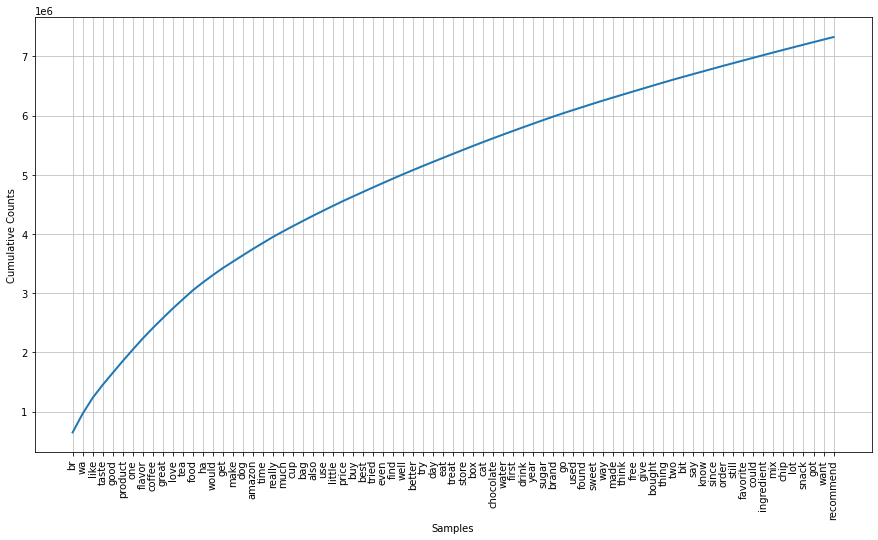

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [237]:
plt.figure(figsize=(15,8))
huckFreq.plot(77, cumulative=True)

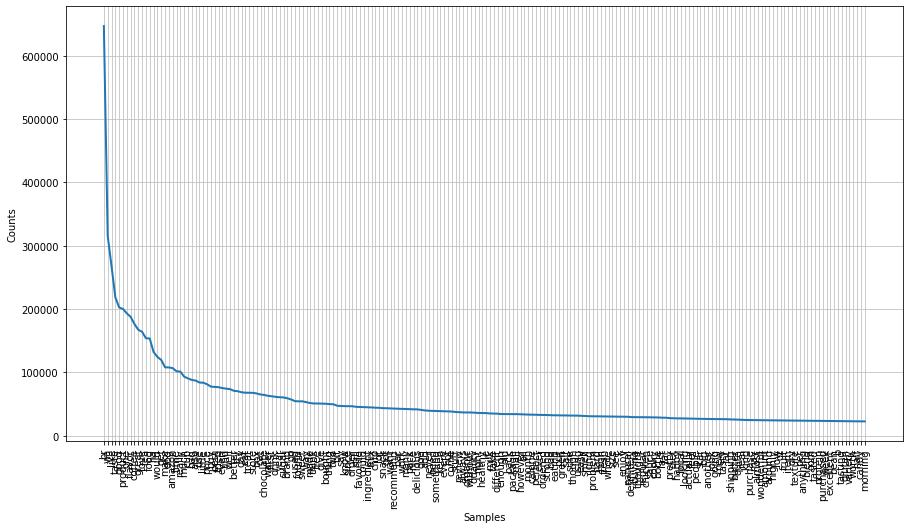

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [238]:
plt.figure(figsize=(15,8))
huckFreq.plot(200)

#### 6.Does the observed relative frequency of these words follow Zipf’s law? Explain.

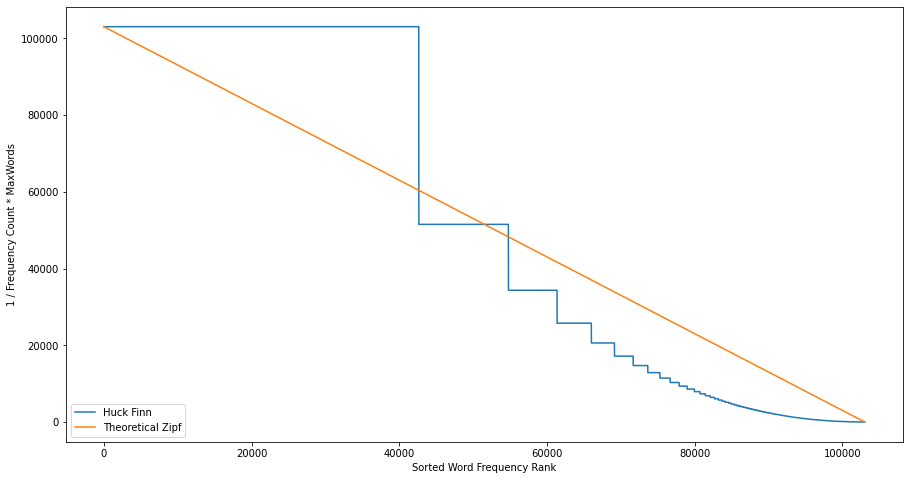

In [239]:
plt.figure(figsize=(15,8))

vals = sorted(huckFreq.values())
inv = [1/float(v) * uniqueWords for v in vals]

x = range(1, uniqueWords +1)
theory = list(x[::-1])

plt.plot(x, inv)
plt.plot(theory)
plt.xlabel("Sorted Word Frequency Rank")
plt.ylabel("1 / Frequency Count * MaxWords")
plt.legend(['Huck Finn', 'Theoretical Zipf'], loc='lower left')

#### 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”